# Pymaceuticals Inc.
---

### Analysis

- Looking at the data, it looks like Capomulin and Ramicane were the most used drug to test on mice compared to the other four main drugs listed. Out of the four, it appears that Infubinol and Ceftamin were the least used. In terms of tumor volume, it apprears that Capomulin and Ramicane are the most successful in the mean and median categories and have remained within the 40th percentile rate compared to the rese of the drugs used. Most of the mice were males compared to female by a very slim margin. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results, mouse_metadata, how = "outer", on = "Mouse ID")


# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
len(data_df["Mouse ID"].value_counts())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
identical_id = data_df.loc[data_df.duplicated(subset = ["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
identical_id

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = data_df.loc[data_df ["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_g989 = data_df[data_df ["Mouse ID"].isin(duplicate_mouse) == False]
drop_g989.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = drop_g989["Mouse ID"].value_counts()
mice_number = len(cleaned_df)
mice_number

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_stat = data_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumorvol_average = summary_stat["Tumor Volume (mm3)"].mean()
tumorvol_median = summary_stat["Tumor Volume (mm3)"].median()
tumorvol_variance = summary_stat["Tumor Volume (mm3)"].var()
tumorvol_stdev = summary_stat["Tumor Volume (mm3)"].std()
tumorvol_sem = summary_stat["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": tumorvol_average,
                          "Medium Tumor Volume": tumorvol_median,
                          "Tumor Volume Variance": tumorvol_variance,
                          "Tumor Volume Std. Dev.": tumorvol_stdev,
                          "Tumor Volume Std. Err.": tumorvol_sem})
summary_df

,Mean Tumor Volume,Medium Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_summary = drop_g989.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregation_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

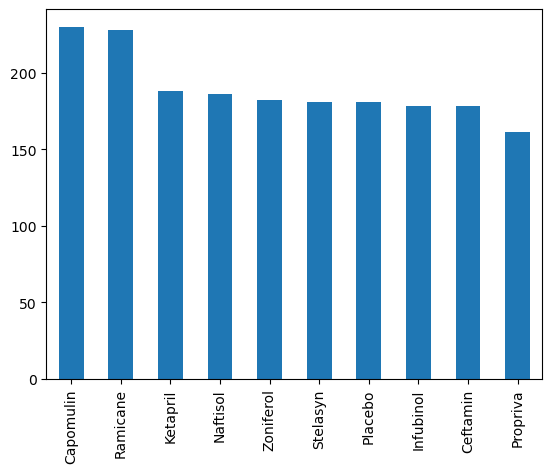

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = data_df["Drug Regimen"].value_counts().plot.bar(x = "Drug Regimen", y = "Number of Mice Tested")

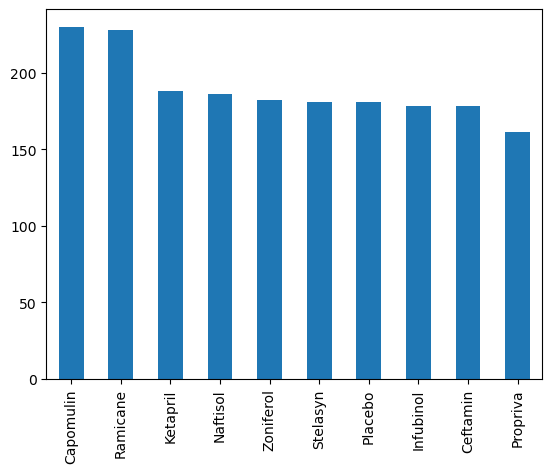

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_plot2 = data_df["Drug Regimen"].value_counts().plot.bar(x = "Drug Regimen", y = "Number of Mice Tested")

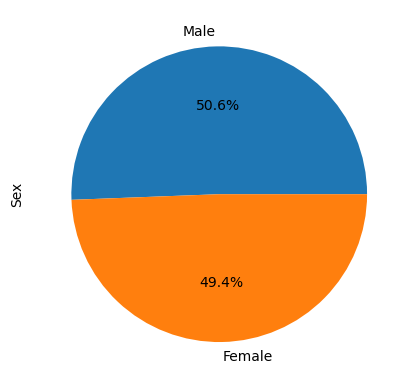

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = data_df["Sex"].value_counts()
gender.plot.pie(autopct = "%1.1f%%")
plt.show()

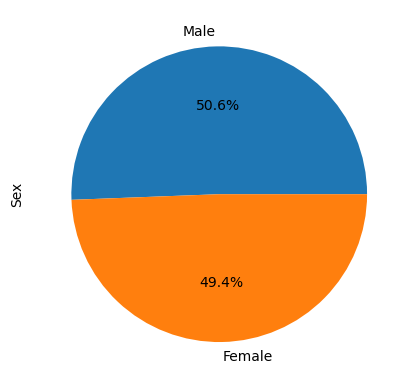

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender2 = gender.plot.pie(y = "Total Count", autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [6]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = data_df.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_volume = ("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments_df = data_df[data_df["Drug Regimen"].isin(treatments_list)]
treatments_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_voldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments_list:
    tumor_voldata = treatments_df.loc[treatments_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

# add subset  


# Determine outliers using upper and lower bounds
tumors = data_df["Tumor Volume (mm3)"]
quartiles = tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 28.065 could be outliers.
Values above 73.225 could be outliers.


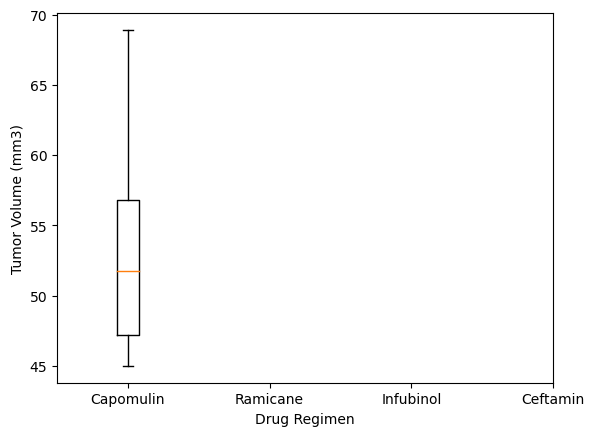

In [13]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.subplots()
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.boxplot(tumor_voldata)
plt.xticks([1,2,3,4],treatments_list)
plt.show()

## Line and Scatter Plots

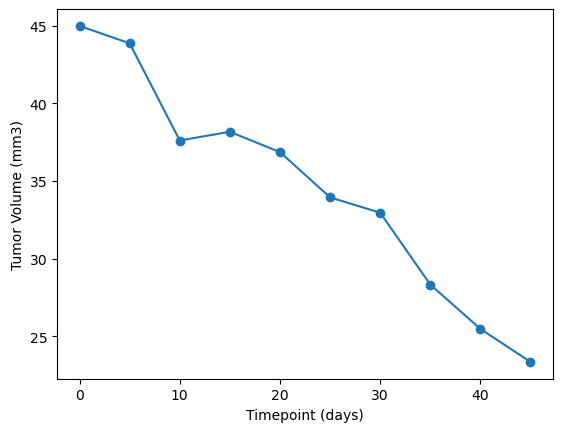

In [107]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = data_df.loc[data_df["Mouse ID"] == "s185"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

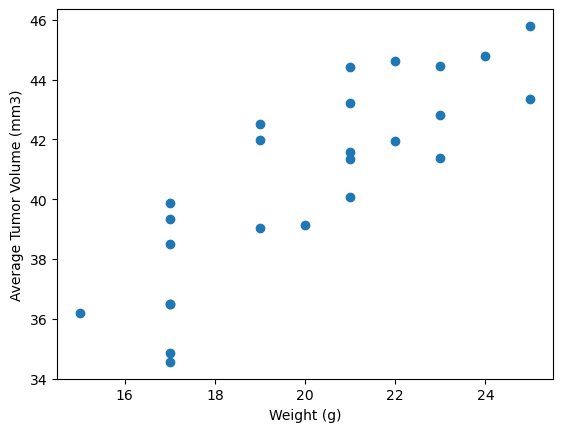

In [6]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = data_df.loc[data_df["Drug Regimen"] == "Capomulin", :]
average_cap = scatter_plot.groupby(["Mouse ID"]).mean()
plt.scatter(average_cap["Weight (g)"], average_cap["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

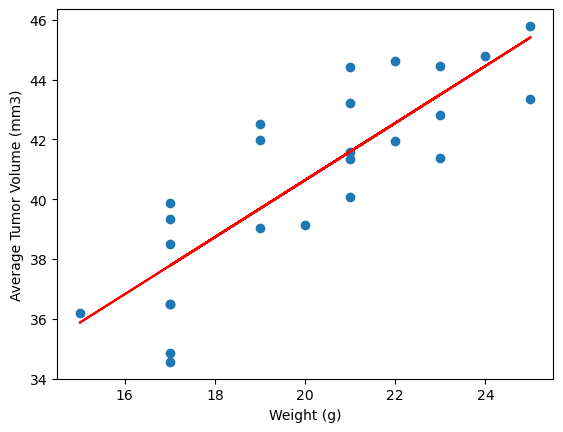

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr) = st.linregress(average_cap["Weight (g)"],average_cap["Tumor Volume (mm3)"])
regress_values = average_cap["Weight (g)"]* slope + intercept

plt.scatter(average_cap["Weight (g)"],average_cap["Tumor Volume (mm3)"])
plt.plot(average_cap["Weight (g)"], regress_values, color ='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()